In [1]:
from keras import models, layers
from ngdlm import models as ngdlmodels
from ngdlm import utils as ngdlutils
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


# Train- and test-data.

In [2]:
(x_input_train, y_output_train), (x_input_test, y_output_test) = mnist.load_data()
x_input_train = x_input_train.astype("float32") / 255.0
x_input_test = x_input_test.astype("float32") / 255.0
print(x_input_train.shape)
print(x_input_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Triplet loss.

In [5]:
latent_dim = 8

# Create the base-model.
base_input = layers.Input(shape=(28, 28))
base_output = base_input
base_output = layers.Flatten()(base_output)
base_output = layers.Dense(512, activation="relu")(base_output)
base_output = layers.Dense(256, activation="relu")(base_output)
base_output = layers.Dense(128, activation="relu")(base_output)
base_output = layers.Dense(latent_dim)(base_output)

# Create the triplet loss model.
tl = ngdlmodels.TL(base_input, base_output)
tl.compile(optimizer="rmsprop", triplet_loss="euclidean")
#tl.summary()

# Train.
print("Train...")
history = tl.fit(
        x_input_train, y_output_train,
        epochs=1000,
        batch_size=128,
        steps_per_epoch=1000,
        minibatch_size=10,
        shuffle=True,
        validation_data=(x_input_test, y_output_test),
        validation_steps=500
    )
    
# Evaluate.
#print("Evaluate...")
#loss = ae.model.evaluate(x_input_test, x_input_test)
#print("Loss:", loss)

Initializing TL
Train...
Epoch 1/1000...
loss [0.001573616017587483]
val_loss [0.3138531744480133]
Epoch 2/1000...
loss [0.002002035681856796]
val_loss [0.4051530957221985]
Epoch 3/1000...
loss [0.001967367359204218]
val_loss [0.26519089937210083]
Epoch 4/1000...
loss [0.0015974408753681927]
val_loss [0.2947257459163666]
Epoch 5/1000...
loss [0.0018182074304204435]
val_loss [0.31330329179763794]
Epoch 6/1000...
loss [0.0014894354492425918]
val_loss [0.3437313735485077]
Epoch 7/1000...
loss [0.0015594527535140515]
val_loss [0.3233972191810608]
Epoch 8/1000...
loss [0.0011788920531980694]
val_loss [0.3255694806575775]
Epoch 9/1000...
loss [0.0011034956101793796]
val_loss [0.2246941328048706]
Epoch 10/1000...
loss [0.0010607628324069082]
val_loss [0.4005579948425293]
Epoch 11/1000...
loss [0.0011014159033074975]
val_loss [0.24329347908496857]
Epoch 12/1000...
loss [0.0007678436459973455]
val_loss [0.2970578670501709]
Epoch 13/1000...
loss [0.001041351830586791]
val_loss [0.296209692955017

loss [0.0001430454954970628]
val_loss [0.18852797150611877]
Epoch 109/1000...
loss [0.00023780931462533773]
val_loss [0.14400896430015564]
Epoch 110/1000...
loss [0.0002656457033008337]
val_loss [0.16092821955680847]
Epoch 111/1000...
loss [0.0002182997886557132]
val_loss [0.15721212327480316]
Epoch 112/1000...
loss [0.0002488722796551883]
val_loss [0.14963889122009277]
Epoch 113/1000...
loss [0.00017351366486400365]
val_loss [0.11861385405063629]
Epoch 114/1000...
loss [0.00023763258731923997]
val_loss [0.2585071325302124]
Epoch 115/1000...
loss [0.00028116699191741643]
val_loss [0.1191854178905487]
Epoch 116/1000...
loss [0.00024411681992933155]
val_loss [0.12031391263008118]
Epoch 117/1000...
loss [0.0001489215982146561]
val_loss [0.20533519983291626]
Epoch 118/1000...
loss [0.0003103920975700021]
val_loss [0.153799906373024]
Epoch 119/1000...
loss [0.0003180078633595258]
val_loss [0.09696497768163681]
Epoch 120/1000...
loss [0.00024070225469768048]
val_loss [0.07219158113002777]
Ep

loss [0.00023054269631393254]
val_loss [0.08717812597751617]
Epoch 214/1000...
loss [0.00012245398829691112]
val_loss [0.15628685057163239]
Epoch 215/1000...
loss [0.00014685407956130804]
val_loss [0.12755104899406433]
Epoch 216/1000...
loss [0.00015572821674868464]
val_loss [0.19747741520404816]
Epoch 217/1000...
loss [8.560892683453859e-05]
val_loss [0.15725480020046234]
Epoch 218/1000...
loss [0.0002598472069948912]
val_loss [0.13737262785434723]
Epoch 219/1000...
loss [0.00016402942244894803]
val_loss [0.13551922142505646]
Epoch 220/1000...
loss [8.889401378110051e-05]
val_loss [0.10539640486240387]
Epoch 221/1000...
loss [0.00011690091318450868]
val_loss [0.1027749627828598]
Epoch 222/1000...
loss [0.0001565658897161484]
val_loss [0.08784439414739609]
Epoch 223/1000...
loss [0.00013029785722028464]
val_loss [0.18700948357582092]
Epoch 224/1000...
loss [0.00011796915112063289]
val_loss [0.12466201186180115]
Epoch 225/1000...
loss [0.0001399670885875821]
val_loss [0.2336276173591613

loss [9.294005832634866e-05]
val_loss [0.19993293285369873]
Epoch 319/1000...
loss [0.00022513002157211303]
val_loss [0.10942167043685913]
Epoch 320/1000...
loss [0.00016891031921841205]
val_loss [0.07280120253562927]
Epoch 321/1000...
loss [8.557841181755065e-05]
val_loss [0.11486942321062088]
Epoch 322/1000...
loss [0.00014448789157904684]
val_loss [0.10104537010192871]
Epoch 323/1000...
loss [0.00015957297012209891]
val_loss [0.12142504751682281]
Epoch 324/1000...
loss [0.00012303894641809167]
val_loss [0.16261820495128632]
Epoch 325/1000...
loss [8.719541877508164e-05]
val_loss [0.1385643631219864]
Epoch 326/1000...
loss [0.00014601798029616474]
val_loss [0.1630713939666748]
Epoch 327/1000...
loss [0.0002135332031175494]
val_loss [0.054623499512672424]
Epoch 328/1000...
loss [0.00015523737180046738]
val_loss [0.09734174609184265]
Epoch 329/1000...
loss [0.00014455438312143087]
val_loss [0.1389182209968567]
Epoch 330/1000...
loss [0.0001703757061623037]
val_loss [0.075664222240448]


loss [8.804958616383374e-05]
val_loss [0.10642446577548981]
Epoch 424/1000...
loss [0.00011265870183706284]
val_loss [0.09536728262901306]
Epoch 425/1000...
loss [5.8791665825992824e-05]
val_loss [0.10722502321004868]
Epoch 426/1000...
loss [9.053655341267586e-05]
val_loss [0.09583774954080582]
Epoch 427/1000...
loss [8.754181279800832e-05]
val_loss [0.09560784697532654]
Epoch 428/1000...
loss [9.155807853676378e-05]
val_loss [0.0753043070435524]
Epoch 429/1000...
loss [7.729761861264706e-05]
val_loss [0.14545121788978577]
Epoch 430/1000...
loss [0.00012143492419272661]
val_loss [0.1521592140197754]
Epoch 431/1000...
loss [9.173558419570326e-05]
val_loss [0.12138673663139343]
Epoch 432/1000...
loss [0.00010151855973526835]
val_loss [0.047981761395931244]
Epoch 433/1000...
loss [0.00010608502896502614]
val_loss [0.1335953325033188]
Epoch 434/1000...
loss [7.330717891454696e-05]
val_loss [0.14212863147258759]
Epoch 435/1000...
loss [4.999561607837677e-05]
val_loss [0.1569978892803192]
Ep

loss [9.017988643608987e-05]
val_loss [0.11425749212503433]
Epoch 529/1000...
loss [0.00012681254674680532]
val_loss [0.09900340437889099]
Epoch 530/1000...
loss [4.9024665728211405e-05]
val_loss [0.08659142255783081]
Epoch 531/1000...
loss [0.0001244464155752212]
val_loss [0.09281697124242783]
Epoch 532/1000...
loss [2.626198437064886e-05]
val_loss [0.11522325128316879]
Epoch 533/1000...
loss [6.969045964069664e-05]
val_loss [0.11539244651794434]
Epoch 534/1000...
loss [7.728076539933681e-05]
val_loss [0.11479231715202332]
Epoch 535/1000...
loss [6.410339497961104e-05]
val_loss [0.24066707491874695]
Epoch 536/1000...
loss [9.78601654060185e-05]
val_loss [0.04283005744218826]
Epoch 537/1000...
loss [8.305958495475352e-05]
val_loss [0.06690774857997894]
Epoch 538/1000...
loss [1.812998065724969e-05]
val_loss [0.12523715198040009]
Epoch 539/1000...
loss [9.940167982131242e-05]
val_loss [0.0411686971783638]
Epoch 540/1000...
loss [0.00014451106265187262]
val_loss [0.0930870920419693]
Epoc

loss [5.432973918505013e-05]
val_loss [0.13529124855995178]
Epoch 634/1000...
loss [6.587978056631983e-05]
val_loss [0.11145024001598358]
Epoch 635/1000...
loss [0.00012584509700536728]
val_loss [0.1317494511604309]
Epoch 636/1000...
loss [8.09074891731143e-05]
val_loss [0.09075033664703369]
Epoch 637/1000...
loss [6.027544243261218e-05]
val_loss [0.06815902888774872]
Epoch 638/1000...
loss [7.633247342891991e-05]
val_loss [0.0887250304222107]
Epoch 639/1000...
loss [6.102739833295345e-05]
val_loss [0.13547807931900024]
Epoch 640/1000...
loss [3.803481487557292e-05]
val_loss [0.12614041566848755]
Epoch 641/1000...
loss [5.1469116006046537e-05]
val_loss [0.10946693271398544]
Epoch 642/1000...
loss [4.767142236232758e-05]
val_loss [0.12149671465158463]
Epoch 643/1000...
loss [0.00012502325186505915]
val_loss [0.1283094882965088]
Epoch 644/1000...
loss [6.76733257714659e-05]
val_loss [0.22415415942668915]
Epoch 645/1000...
loss [4.9353830516338346e-05]
val_loss [0.07484617829322815]
Epoch

loss [5.148381367325783e-05]
val_loss [0.06773491948843002]
Epoch 740/1000...
loss [0.00012015600129961968]
val_loss [0.0953487753868103]
Epoch 741/1000...
loss [3.189959470182657e-05]
val_loss [0.12029063701629639]
Epoch 742/1000...
loss [6.427461840212346e-05]
val_loss [0.097762830555439]
Epoch 743/1000...
loss [6.665145698934793e-05]
val_loss [0.14128607511520386]
Epoch 744/1000...
loss [6.436485447920859e-05]
val_loss [0.1607987880706787]
Epoch 745/1000...
loss [9.406532347202301e-05]
val_loss [0.06332207471132278]
Epoch 746/1000...
loss [9.594992385245859e-05]
val_loss [0.09053681790828705]
Epoch 747/1000...
loss [2.521404158324003e-05]
val_loss [0.09170893579721451]
Epoch 748/1000...
loss [5.565703846514225e-05]
val_loss [0.04211927950382233]
Epoch 749/1000...
loss [6.026790640316904e-05]
val_loss [0.06797671318054199]
Epoch 750/1000...
loss [3.4158822149038316e-05]
val_loss [0.14890657365322113]
Epoch 751/1000...
loss [6.646467861719429e-05]
val_loss [0.11456373333930969]
Epoch 

loss [0.00010374660789966583]
val_loss [0.1355745494365692]
Epoch 846/1000...
loss [8.963517425581813e-05]
val_loss [0.20681852102279663]
Epoch 847/1000...
loss [5.641690967604518e-05]
val_loss [0.07857246696949005]
Epoch 848/1000...
loss [6.796105951070785e-05]
val_loss [0.08308310806751251]
Epoch 849/1000...
loss [3.0116898007690908e-05]
val_loss [0.20709232985973358]
Epoch 850/1000...
loss [6.513031315989792e-05]
val_loss [0.10908205807209015]
Epoch 851/1000...
loss [0.00010204514139331877]
val_loss [0.1177360787987709]
Epoch 852/1000...
loss [4.8962998436763886e-05]
val_loss [0.12290595471858978]
Epoch 853/1000...
loss [5.383736756630242e-05]
val_loss [0.033015355467796326]
Epoch 854/1000...
loss [5.055355001240969e-05]
val_loss [0.14859524369239807]
Epoch 855/1000...
loss [7.64990821480751e-05]
val_loss [0.09954699873924255]
Epoch 856/1000...
loss [5.8131393045187e-05]
val_loss [0.0753733292222023]
Epoch 857/1000...
loss [6.18175172712654e-05]
val_loss [0.1296376883983612]
Epoch 8

loss [3.207741910591721e-05]
val_loss [0.12609536945819855]
Epoch 952/1000...
loss [0.00010682282317429781]
val_loss [0.1582896113395691]
Epoch 953/1000...
loss [4.25535764079541e-05]
val_loss [0.11436793208122253]
Epoch 954/1000...
loss [6.716054677963257e-05]
val_loss [0.0801037922501564]
Epoch 955/1000...
loss [5.798309110105038e-05]
val_loss [0.09635720402002335]
Epoch 956/1000...
loss [6.156051927246154e-05]
val_loss [0.04273073747754097]
Epoch 957/1000...
loss [6.925272359512747e-05]
val_loss [0.07392258942127228]
Epoch 958/1000...
loss [8.904144237749278e-05]
val_loss [0.108577661216259]
Epoch 959/1000...
loss [8.135615289211273e-05]
val_loss [0.08861087262630463]
Epoch 960/1000...
loss [5.550690577365458e-05]
val_loss [0.0680408626794815]
Epoch 961/1000...
loss [9.50414421968162e-05]
val_loss [0.11648223549127579]
Epoch 962/1000...
loss [5.744458455592394e-05]
val_loss [0.1592807173728943]
Epoch 963/1000...
loss [4.847630904987455e-05]
val_loss [0.08002296835184097]
Epoch 964/1

# Visualizing triplet-loss.

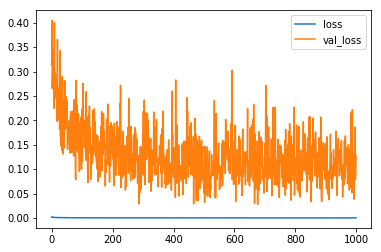

Rendering encodings...


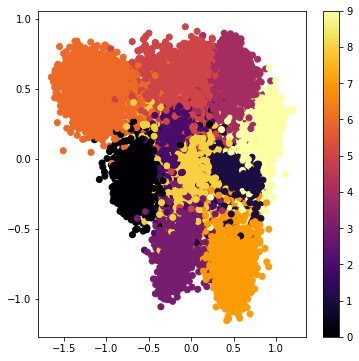

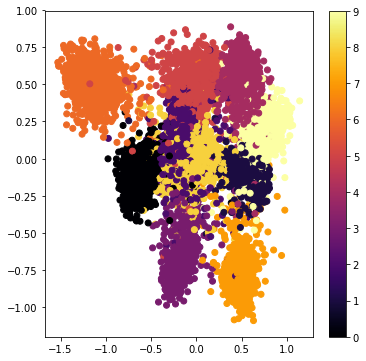

In [7]:
#print("Rendering history...")
ngdlutils.render_history(history)

print("Rendering encodings...")
ngdlutils.render_encodings(tl.base, x_input_train, y_output_train)
ngdlutils.render_encodings(tl.base, x_input_test, y_output_test)

# TODO visualize triplets